
# Predicting BMW Used Car Price Part I: Load and Clean 

This project will use Supervised Machine Learning to predict the price of a used BMW car.
Part I of this project will load and inspect data. They will also be cleaned and transformed into a suitable format for our analysis.

The project will follow the below:

- Read data
- Data validation and profiling
- Data transformation
- Exploratory data analysis

Functions were created to automate the above tasks.

## Read Data

The data in csv format will be read in pandas dataframe but first let us import the libraries and modules to use in accomplishing the above mentioned tasks.

### import dependencies

In [1]:
# import dependencies
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import custom modules
import funcs
import plots
import utils

In [3]:
# specify data path
data_path = 'data/bmw.csv'

In [4]:
# read and qa data
df, df_null = funcs.read_and_qa(data_path)

Checking for duplicate rows in the dataframe...
Dropping duplicate rows in dataframe.
There are 9 columns and 10664 records in the dataframe.
Extracting count and percentages of nulls and non nulls


Let's check for nulls in data

In [5]:
# plot count of nulls
plots.plot_qa(df_null)

There are zero nulls in the DataFrame.
No plot to display!


The does not contain null values.

We shall now proceed to inspect the data.

In [6]:
# check head of data
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [7]:
# describe numerical features
df.describe()

,year,price,mileage,tax,mpg,engineSize
count,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000,10664.000000
mean,2017.062828,22692.888691,25710.978995,131.597431,56.483121,2.170161
std,2.350668,11434.921030,25146.634940,61.611394,31.465604,0.552556
min,1996.000000,1200.000000,1.000000,0.000000,5.500000,0.000000
25%,2016.000000,14897.000000,5665.750000,135.000000,45.600000,2.000000
50%,2017.000000,20261.500000,18783.000000,145.000000,53.300000,2.000000
75%,2019.000000,27890.000000,38436.500000,145.000000,62.800000,2.000000
max,2020.000000,123456.000000,214000.000000,580.000000,470.800000,6.600000


In [8]:
# describe categorical features
df.describe(exclude='number')

,model,transmission,fuelType
count,10664,10664,10664
unique,24,3,5
top,3 Series,Semi-Auto,Diesel
freq,2434,4637,6988


In [9]:
# inspect to check for data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10664 entries, 0 to 10663
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10664 non-null  object 
 1   year          10664 non-null  int64  
 2   price         10664 non-null  int64  
 3   transmission  10664 non-null  object 
 4   mileage       10664 non-null  int64  
 5   fuelType      10664 non-null  object 
 6   tax           10664 non-null  int64  
 7   mpg           10664 non-null  float64
 8   engineSize    10664 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 749.9+ KB


We shall also look at count of unique values in data.

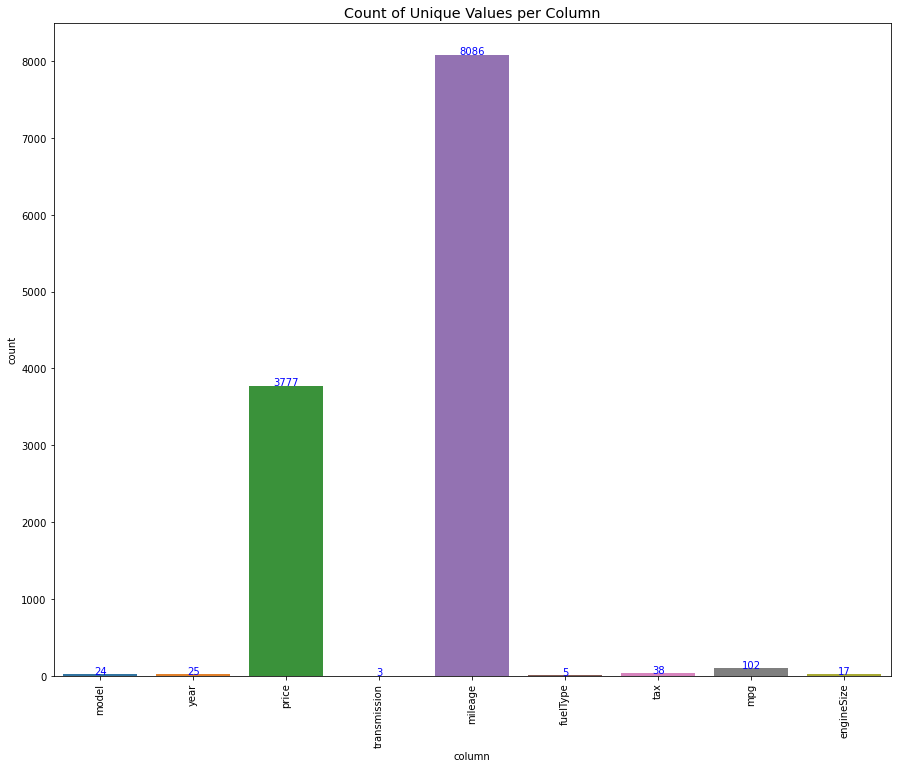

In [10]:
# plot unique value counts
plots.plot_unique_vals_count(df)

Our focus is more on the categorical features when deciding to create the above plot as it displays the count of unique values. We can tell that there are 24 unique bmw models, 5 distinct fuel types and, 3 distinct transmission categories. Also, the describe cells give us an idea of the time period being analyzed (1996 - 2020) and summary statistics of numerical features. For example, we can tell the max price in this dataset is 123,456.00 USD while the average is $22,692.88 USD.

## Clean and transform data

Having profiled the data, we shall now clean and transform it into a suitable format for exploratory analysis and then later for machine learning. A copy of the clean and transformed data is saved in csv format for subsequent analysis.

For the cleaning aspect, leading and trailing spaces were stripped from model values while the only transformation conducted was to extract age or number of years of the car as it makes more sense to interprete age.

In [11]:
# clean, transform and save clean data
df_cln = funcs.bmw_data_clean(df)

## Exploratory Data Analysis

In this section, we will look at trends and try to extract insights in the data by analyzing the following:

- Time Series of Price against variables like transmission, fueltype and model
- Distribution of Price
- Correlation of features

### How has price changed over time?

First, let's observe how price has changed over time for all bmw models.

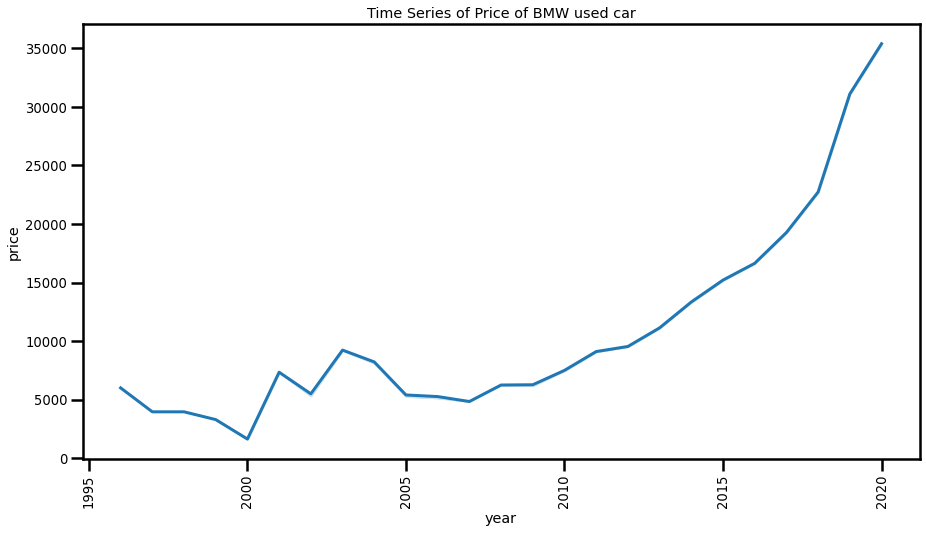

In [12]:
plots.line_plot(df_cln, 'year', 'price')

Initially, we can see prices plummet from around 1996 to 2000. The gradual increase is obeserved from 2000 to 2005 when they slightly dropped again and plateaued until 2006. This trend change right after with a yearly increase on to 2020.

Before moving on to analyzing model trends, we will look at how prices have also changed for fuel typ and transmission.

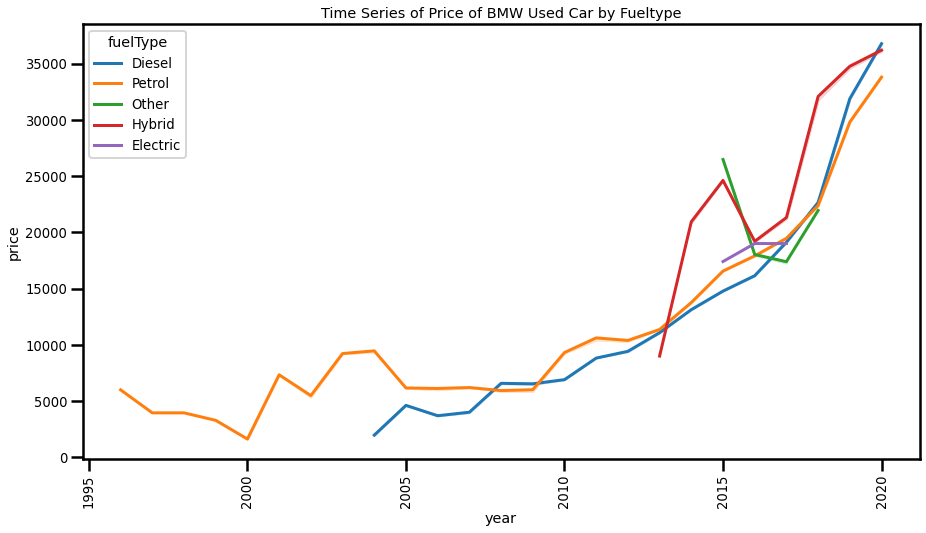

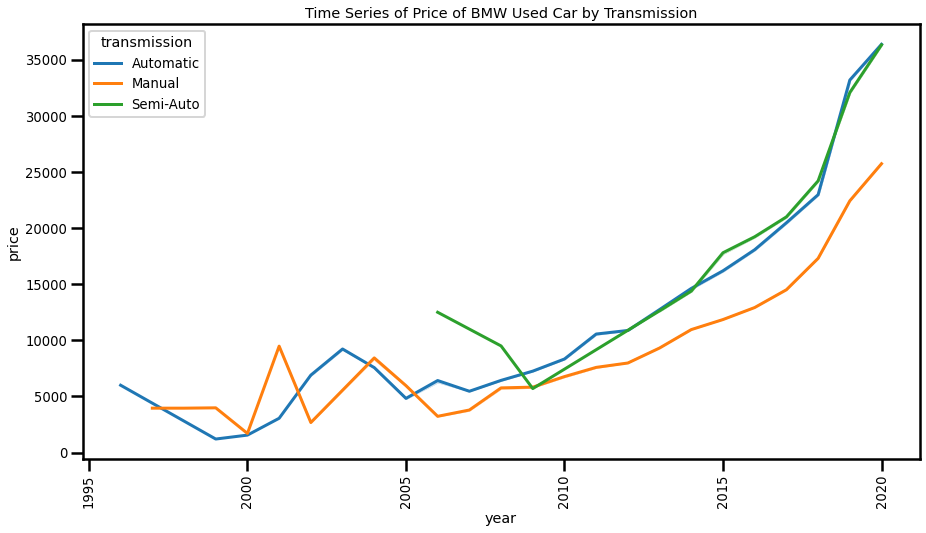

In [13]:
# plot time series for fule type and transmission
cols = ['fuelType', 'transmission']
for col in cols:
    plots.line_plot(df_cln, 'year', 'price', hue = col)

We can that prices have increased over time for tthe two variables plotted above. Trens worth mentioning are observed in the electric, hybrid and other fuel type. These types came into the market in recent years starting with hybrid around 2013 while electric and other came few years after that in 2015.

Also, for transmission types, we can tell semi-auto was introduced around 2006 and has also enjoyed similar growth compared to manual and automatic.

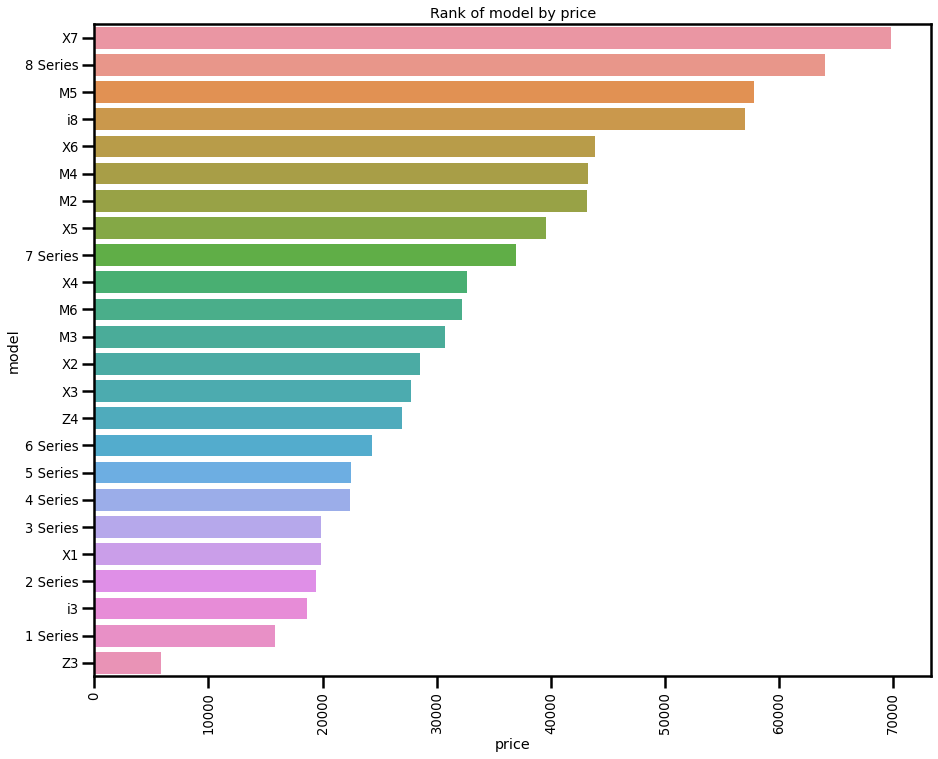

In [14]:
plots.rank_feature(df_cln, 'model', 'price')